In [1]:
%matplotlib nbagg
import numpy as np
import json
import os, math
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

from alvra_tools.load_data import *
from alvra_tools.channels import *
#from alvra_tools.channels_raw import *
from alvra_tools.utils import errfunc_sigma, errfunc_fwhm

In [7]:

scan_name ="XAS-L-cystine-monoscan"
#scan_range =".run002119-002167"

scan_range = ".run002397-002445"

# scan_name ="XAS-L-cystine-monoscan"
# scan_range =".run001296-001328"
    
#DIR = "/sf/alvra/data/p18387/raw
#DIR_json = "/sf/alvra/data/p17983/res/scan_info/"

#DIR = "/sf/alvra/data/p18387/raw/scan_data/" + scan_name + "/"
DIR = "/sf/alvra/data/p18387/raw/scan_data/" + scan_name + "/"

DIR_json = "/sf/alvra/data/p18387/res/scan_info/"
#DIR = "/das/work/p17/p17983/Example_data/raw/scan_data/" + scan_name + "/"
#DIR_json = "/das/work/p17/p17983/Example_data/res/scan_info/"


!ls -lah -rt $DIR
!hostname

listfile = os.listdir(DIR)
number_files = len(listfile)
print ("There are",number_files,"files in the folder", DIR)


total 3.2T
-rw-r--r--.  1 root p18387  531M Feb 20 04:05 run_001043.BSREAD.h5
-rw-r--r--.  1 root p18387  626M Feb 20 04:05 run_001043.BSREAD.IMAGES.h5
-rw-r--r--.  1 root p18387  531M Feb 20 04:06 run_001044.BSREAD.h5
-rw-r--r--.  1 root p18387  626M Feb 20 04:06 run_001044.BSREAD.IMAGES.h5
-rw-r--r--.  1 root p18387  531M Feb 20 04:07 run_001045.BSREAD.h5
-rw-r--r--.  1 root p18387  628M Feb 20 04:07 run_001045.BSREAD.IMAGES.h5
-rw-r--r--.  1 root p18387  531M Feb 20 04:08 run_001046.BSREAD.h5
-rw-r--r--.  1 root p18387  628M Feb 20 04:08 run_001046.BSREAD.IMAGES.h5
-rw-r--r--.  1 root p18387  531M Feb 20 04:09 run_001047.BSREAD.h5
-rw-r--r--.  1 root p18387  627M Feb 20 04:09 run_001047.BSREAD.IMAGES.h5
-rw-r--r--.  1 root p18387  531M Feb 20 04:09 run_001048.BSREAD.h5
-rw-r--r--.  1 root p18387  627M Feb 20 04:09 run_001048.BSREAD.IMAGES.h5
-rw-r--r--.  1 root p18387  531M Feb 20 04:10 run_001049.BSREAD.h5
-rw-r--r--.  1 root p18387  628M Feb 20 04:10 run_001049.BSREAD.IMAGES.h5
-r

ra-c-003.psi.ch
There are 857 files in the folder /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-monoscan/


## XAS-L-cystine-monoscan 
run002119-002167: 2467 - 2482 eV
run002158-002206: 2462 - 2470 eV

# Load one step and filter some data from I0

In [30]:
#f ="RuDimerACN_monoscan_0p6ps_018_step0003.BSREAD.h5"
f ="run_001421.BSREAD.h5"
fn = DIR + f

(DataFluo_pump_shot, DataFluo_unpump_shot, IzeroFEL_pump_shot, IzeroFEL_unpump_shot, Energy_shot, \
 DataTrans_pump_shot, DataTrans_unpump_shot) = load_PumpProbe_events(fn, channel_energy)

IzeroFEL_pump_original = IzeroFEL_pump_shot.copy()
IzeroFEL_unpump_original = IzeroFEL_unpump_shot.copy()
print ("Energy {} eV".format(Energy_shot.mean()))


conditionPumpMax = IzeroFEL_pump_shot < np.median(IzeroFEL_pump_shot)+3*(np.std(IzeroFEL_pump_shot))
conditionPumpMin = IzeroFEL_pump_shot > np.median(IzeroFEL_pump_shot)-3*(np.std(IzeroFEL_pump_shot))

conditionUnPumpMax = IzeroFEL_unpump_shot < np.median(IzeroFEL_unpump_shot)+3*(np.std(IzeroFEL_unpump_shot))
conditionUnPumpMin = IzeroFEL_unpump_shot > np.median(IzeroFEL_unpump_shot)-3*(np.std(IzeroFEL_unpump_shot))

conditionGeneral = IzeroFEL_pump_shot > 0.01
conditionGeneral2 = IzeroFEL_unpump_shot > 0.01

IzeroFEL_pump_shot = IzeroFEL_pump_shot[conditionPumpMin & conditionPumpMax & conditionUnPumpMin & conditionUnPumpMax & conditionGeneral & conditionGeneral2]
IzeroFEL_unpump_shot = IzeroFEL_unpump_shot[conditionPumpMin & conditionPumpMax & conditionUnPumpMin & conditionUnPumpMax & conditionGeneral & conditionGeneral2]

DataFluo_pump_shot = DataFluo_pump_shot[conditionPumpMin & conditionPumpMax & conditionUnPumpMin & conditionUnPumpMax & conditionGeneral & conditionGeneral2]
#Izero_pump_loop = [x for x in Izero_unpump_loop if (np.abs(x) > 1000)]

IzeroFEL_pump_shot = np.asarray(IzeroFEL_pump_shot)
IzeroFEL_pump_original = np.asarray(IzeroFEL_pump_original)

print (IzeroFEL_pump_original.shape, IzeroFEL_unpump_original.shape)
print (IzeroFEL_pump_shot.shape, IzeroFEL_unpump_shot.shape)

print ("Median value Izero = {}".format(np.median(IzeroFEL_pump_shot)))# - 2*(np.std(IzeroFEL_pump_shot))
print ("Median value fluo = {}".format(np.median(DataFluo_pump_shot)))# - 2*(np.std(IzeroFEL_pump_shot)))


Found 1999 shots in the file
Load 1998 shots
Pump/umpump arrays have 499 shots each
Energy 2472.005606446327 eV
(499,) (499,)
(476,) (476,)
Median value Izero = 0.30376370064914227
Median value fluo = 0.375


# Load mono scan

In [3]:
#json_file = DIR_json + scan_name + "_scan_info.json"
json_file = DIR_json + scan_name + scan_range + ".json"
print (json_file)

with open(json_file) as file:
    data = json.load(file)
numFiles = len(data['scan_files'])
print ()
#numFiles = 35

print ("Processing",numFiles,"files")

DataFluo_pump = []
DataFluo_unpump = []
err_DataFluo_pump = []
err_DataFluo_unpump = []

DataTrans_pump = []
DataTrans_unpump = []
err_DataTrans_pump = []
err_DataTrans_unpump = []

Pump_probe = []
err_Pump_probe = []

Energy_eV = []


# from itertools import chain
# concatenated = chain(range(0,37), range(43, 50))
# for i in concatenated:
for i in range(0,numFiles):             
    filename = str(data['scan_files'][i][0])    
    exists = os.path.isfile(filename)
    if exists: #and i!=0:
        print("step",i+1,"of",numFiles,": Processing %s" %(str(data['scan_files'][i][0])))
        
        (DataFluo_pump_shot, DataFluo_unpump_shot, IzeroFEL_pump_shot, IzeroFEL_unpump_shot, Energy_shot, \
         DataTrans_pump_shot, DataTrans_unpump_shot) = load_PumpProbe_events(filename, channel_energy)
        
        ###################I0 threshold: to make threshold#########################
        threshold_pump = IzeroFEL_pump_shot > 0.2
        threshold_unpump = IzeroFEL_unpump_shot > 0.2
        threshold_pump_shot = DataFluo_pump_shot > 0.001
        threshold_unpump_shot = DataFluo_unpump_shot > 0.001
        ##########################################################################
        
        ###################I0 threshold: to calculation for avg#########################
        _threshold_pump = IzeroFEL_pump_shot > 0.1
        _threshold_unpump = IzeroFEL_unpump_shot > 0.1
        _threshold_pump_shot = DataFluo_pump_shot > 0.001
        _threshold_unpump_shot = DataFluo_unpump_shot > 0.001
        ################################################################################
        
        scale_I0 = 4
        ############################I0 maximum#####################
        condition_pump = IzeroFEL_pump_shot < np.median(IzeroFEL_pump_shot)+scale_I0*(np.std(IzeroFEL_pump_shot))
#         print (np.median(IzeroFEL_pump_shot)+scale_I0*(np.std(IzeroFEL_pump_shot)))
        condition_unpump = IzeroFEL_unpump_shot < np.median(IzeroFEL_unpump_shot)+scale_I0*(np.std(IzeroFEL_unpump_shot))

        DataFluo_pump_shot_ = DataFluo_pump_shot[condition_pump & threshold_pump & threshold_pump_shot]
        IzeroFEL_pump_shot_ = IzeroFEL_pump_shot[condition_pump & threshold_pump & threshold_pump_shot]
#         DataFluo_pump_shot = DataFluo_pump_shot[condition_pump & condition_unpump & threshold_pump & threshold_unpump]
#         IzeroFEL_pump_shot = IzeroFEL_pump_shot[condition_pump & condition_unpump & threshold_pump & threshold_unpump]
#       DataTrans_pump_shot = DataTrans_pump_shot[condition_pump & condition_unpump & threshold_pump & threshold_unpump]
        
        DataFluo_unpump_shot_ = DataFluo_unpump_shot[condition_unpump & threshold_unpump & threshold_unpump_shot]
        IzeroFEL_unpump_shot_ = IzeroFEL_unpump_shot[condition_unpump & threshold_unpump & threshold_unpump_shot]
#         DataFluo_unpump_shot = DataFluo_unpump_shot[condition_pump & condition_unpump & threshold_pump & threshold_unpump]
#         IzeroFEL_unpump_shot = IzeroFEL_unpump_shot[condition_pump & condition_unpump & threshold_pump & threshold_unpump]
#       DataTrans_unpump_shot = DataTrans_unpump_shot[condition_pump & condition_unpump & threshold_pump & threshold_unpump]
        
              
        DataFluo_pump_shot_norm_ = DataFluo_pump_shot_ / IzeroFEL_pump_shot_
        DataFluo_unpump_shot_norm_ = DataFluo_unpump_shot_ / IzeroFEL_unpump_shot_
        
        scale_std = 1
        ###########Data Selection for pump####################
        avg = np.average(DataFluo_pump_shot_norm_)
        std = np.std(DataFluo_pump_shot_norm_)
        _DataFluo_pump_shot = DataFluo_pump_shot[condition_pump & _threshold_pump & _threshold_pump_shot]
        _IzeroFEL_pump_shot = IzeroFEL_pump_shot[condition_pump & _threshold_pump & _threshold_pump_shot]
        tData_pump = np.array([x for x in  _DataFluo_pump_shot/_IzeroFEL_pump_shot if abs(x-avg) <= scale_std*std ])
        DataFluo_pump.append(np.average(tData_pump))
        err_DataFluo_pump.append(np.std(tData_pump)/math.sqrt(len(tData_pump)))
        
        
        ###########Data Selection for unpump####################
        avg = np.average(DataFluo_unpump_shot_norm_)
        std = np.std(DataFluo_unpump_shot_norm_)
        _DataFluo_unpump_shot = DataFluo_unpump_shot[condition_unpump & _threshold_unpump & _threshold_unpump_shot]
        _IzeroFEL_unpump_shot = IzeroFEL_unpump_shot[condition_unpump & _threshold_unpump & _threshold_unpump_shot]
        tData_unpump = np.array([x for x in  _DataFluo_unpump_shot/_IzeroFEL_unpump_shot if abs(x-avg) <= scale_std*std ])
        DataFluo_unpump.append(np.average(tData_unpump))
        err_DataFluo_unpump.append(np.std(tData_unpump)/math.sqrt(len(tData_unpump)))
        
        
        Energy_shot = [x for x in Energy_shot if (np.abs(x) > 0)]
        Energy_eV.append(np.mean(Energy_shot))
    
DataFluo_pump = np.asarray(DataFluo_pump)
DataFluo_unpump = np.asarray(DataFluo_unpump)
DataTrans_pump = np.asarray(DataTrans_pump)
DataTrans_unpump = np.asarray(DataTrans_unpump)
              
# Pump_probe = np.asarray(Pump_probe)
# err_Pump_probe = np.asarray(err_Pump_probe)
              
err_DataFluo_pump = np.asarray(err_DataFluo_pump)
err_DataFluo_unpump = np.asarray(err_DataFluo_unpump)
err_DataTrans_pump = np.asarray(err_DataTrans_pump)
err_DataTrans_unpump = np.asarray(err_DataTrans_unpump)
            
Energy_eV = np.asarray(Energy_eV)

print ("Job done!")

/sf/alvra/data/p18387/res/scan_info/XAS-L-cystine-monoscan.run002397-002445.json

Processing 25 files
step 1 of 25 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-monoscan/run_002397.BSREAD.h5
Found 9999 shots in the file
Load 9998 shots
Pump/umpump arrays have 2498 shots each
step 2 of 25 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-monoscan/run_002398.BSREAD.h5
Found 9999 shots in the file
Load 9998 shots
Pump/umpump arrays have 2499 shots each
step 3 of 25 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-monoscan/run_002399.BSREAD.h5
Found 9999 shots in the file
Load 9998 shots
Pump/umpump arrays have 2498 shots each
step 4 of 25 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-monoscan/run_002400.BSREAD.h5
Found 9999 shots in the file
Load 9998 shots
Pump/umpump arrays have 2498 shots each
Job done!


# Plot energy scans

<IPython.core.display.Javascript object>


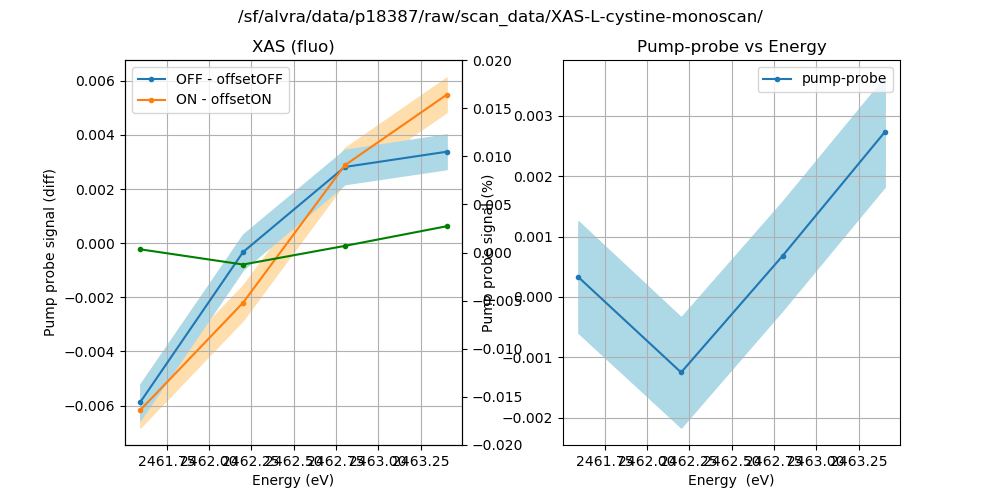

In [4]:
%matplotlib nbagg
plt.figure(figsize = (10,5))
plt.suptitle(DIR, fontsize=12)
scale=1.0
#plt.title(DIR,horizontalalignment='right')

Pump_probe = DataFluo_pump - DataFluo_unpump

TF = True#len(Pump_probe) > 10
FT = False#len(Pump_probe) <= 10

offset_corr_DataFluo_pump = scale*(DataFluo_pump - np.mean(scale*DataFluo_pump[-5:]))#*TF + FT*DataFluo_pump
offset_corr_DataFluo_unpump = scale*(DataFluo_unpump - np.mean(scale*DataFluo_unpump[-5:]))#*TF + FT*DataFluo_unpump
offset_corr_pump_probe = offset_corr_DataFluo_pump - offset_corr_DataFluo_unpump

low_err_pump_offset       = offset_corr_DataFluo_pump - err_DataFluo_pump*scale
high_err_pump_offset      = offset_corr_DataFluo_pump + err_DataFluo_pump*scale
low_err_unpump_offset     = offset_corr_DataFluo_unpump - err_DataFluo_unpump*scale
high_err_unpump_offset    = offset_corr_DataFluo_unpump + err_DataFluo_unpump*scale
low_err_pumpprobe_offset  = (Pump_probe)*scale - np.sqrt(err_DataFluo_pump**2+err_DataFluo_unpump**2)
high_err_pumpprobe_offset = (Pump_probe)*scale + np.sqrt(err_DataFluo_pump**2+err_DataFluo_unpump**2)

low_err_pump = DataFluo_pump - err_DataFluo_pump
high_err_pump = DataFluo_pump + err_DataFluo_pump
low_err_unpump = DataFluo_unpump - err_DataFluo_unpump
high_err_unpump = DataFluo_unpump + err_DataFluo_unpump
low_err_pumpprobe = (Pump_probe) - np.sqrt(err_DataFluo_pump**2+err_DataFluo_unpump**2)
high_err_pumpprobe = (Pump_probe) + np.sqrt(err_DataFluo_pump**2+err_DataFluo_unpump**2)

ax1 = plt.subplot(1,2,1)
ax1.plot(Energy_eV, offset_corr_DataFluo_unpump, label="OFF - offsetOFF",marker='.')
ax1.plot(Energy_eV, offset_corr_DataFluo_pump, label="ON - offsetON",marker='.')
# plt.plot(Energy_eV, offset_corr_pump_probe, label='pump-probe', marker='.')
ax1.fill_between(Energy_eV, low_err_pump_offset, high_err_pump_offset, color='navajowhite')
ax1.fill_between(Energy_eV, low_err_unpump_offset, high_err_unpump_offset, color='lightblue')
#plt.fill_between(Energy_eV, scale*low_err_pumpprobe_offset, scale*high_err_pumpprobe_offset, color='lightblue')
ax2 = ax1.twinx()
ax2.plot(Energy_eV, Pump_probe, label='pump-probe', marker='.',color='green')
ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("Pump probe signal (diff)")
ax1.legend()
ax1.grid()
ax2.set_ylim([-0.02,0.02])
plt.gca().set_title('XAS (fluo)')
#plt.legend(loc="best")
# plt.grid()
plt.subplots_adjust(wspace = 0.3,hspace = 1.) 

# plt.subplot(1,2,1)
# plt.plot(Energy_eV, scale*DataFluo_pump, label="ON",marker='.')
# plt.plot(Energy_eV, scale*DataFluo_unpump, label="OFF",marker='.')
# plt.fill_between(Energy_eV, scale*low_err_pump, scale*high_err_pump, color='lightblue')
# plt.fill_between(Energy_eV, scale*low_err_unpump, scale*high_err_unpump, color='navajowhite')
# plt.xlabel("Energy (eV)")
# plt.gca().set_title('XAS (fluo)')
# plt.legend(loc="best")

plt.subplot(1,2,2)
plt.plot(Energy_eV, scale*(Pump_probe), label="pump-probe",marker='.')
plt.fill_between(Energy_eV, scale*low_err_pumpprobe, scale*high_err_pumpprobe, color='lightblue')
plt.grid()
plt.ylabel ("Pump probe signal (%)")
plt.xlabel("Energy  (eV)")
plt.gca().set_title('Pump-probe vs Energy')
plt.legend(loc="best")
plt.legend(loc="best")
plt.subplots_adjust(wspace = 0.3,hspace = 0.5) 

# print (np.std(Pump_probe))
# pd.DataFrame(
#     {
#         'Energy [eV]': Energy_eV,
#         'XAS_on': DataFluo_pump,
#         'XAS_off': DataFluo_unpump,
#     }
# ).to_csv(os.getcwd()+'/'+scan_range.replace('.','')+'.csv')

plt.show()

## XAS-L-cystine-monoscan: 22Feb2020 (sum
run002119-002167: 2467 - 2482 eV
run002158-002206: 

In [49]:
df_area2 = pd.read_csv('run002119-002167.csv')
df_area1 = pd.read_csv('run002158-002206.csv')
Energy_area2 = [round(x,2) for x in (df_area2['Energy [eV]'].values[::-1])]
xas_on_area2 = df_area2['XAS_on'].values[::-1].tolist()
xas_off_area2 = df_area2['XAS_off'].values[::-1].tolist()


E = []
XAS_on = []
XAS_off = []

print (df_area1['XAS_on'].values[-1])
print ([x for x in range(len(df_area1['Energy [eV]'].values))])
for i in range(len(df_area1['Energy [eV]'].values)):
    if round(df_area1['Energy [eV]'].values[i],2) in Energy_area2:
        E0 = round(df_area1['Energy [eV]'].values[i],2)
        j = Energy_area2.index(E0)
        E.append(E0)
        XAS_on.append((df_area1['XAS_on'].values[i]+xas_on_area2[j])/2)
        XAS_off.append((df_area1['XAS_off'].values[i]+xas_off_area2[j])/2)
    else:
        E.append(round(df_area1['Energy [eV]'].values[i],2))
        XAS_on.append(df_area1['XAS_on'].values[i])
        XAS_off.append(df_area1['XAS_off'].values[i])

for i in range(len(Energy_area2)):
    if Energy_area2[i] in E:
        pass
    else:
        E.append(Energy_area2[i])
        XAS_on.append(xas_on_area2[i])
        XAS_off.append(xas_off_area2[i])

# E = [round(x,2) for x in df_area1['Energy [eV]'].values] + Energy_area2
# XAS_on = df_area1['XAS_on'].values.tolist() + xas_on_area2
# XAS_off = df_area1['XAS_off'].values.tolist() + xas_off_area2

0.6956265797732203
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


<>:16: DeprecationWarning: invalid escape sequence \D
<>:16: DeprecationWarning: invalid escape sequence \D
<>:16: DeprecationWarning: invalid escape sequence \D
<ipython-input-56-94f33c270fa1>:16: DeprecationWarning: invalid escape sequence \D
  plt.title('$\Delta$XAS')


<IPython.core.display.Javascript object>


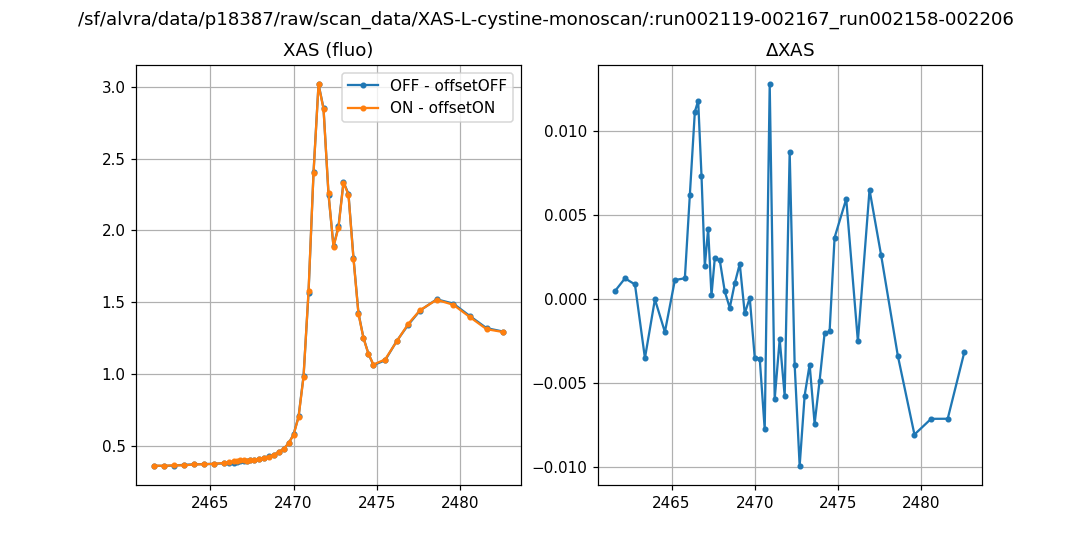

[2461.6, 2462.2, 2462.8, 2463.4, 2464.0, 2464.6, 2465.2, 2465.8, 2466.1, 2466.4, 2466.6, 2466.8, 2467.0, 2467.2, 2467.4, 2467.6, 2467.9, 2468.2, 2468.5, 2468.8, 2469.1, 2469.4, 2469.7, 2470.0, 2470.3, 2470.6, 2470.9, 2471.2, 2471.5, 2471.8, 2472.1, 2472.4, 2472.7, 2473.0, 2473.3, 2473.6, 2473.9, 2474.2, 2474.5, 2474.8, 2475.5, 2476.2, 2476.9, 2477.6, 2478.6, 2479.6, 2480.6, 2481.6, 2482.6]


In [56]:
%matplotlib nbagg
plt.figure(figsize = (10,5))
plt.suptitle(DIR+':'+'run002119-002167_run002158-002206', fontsize=12)

ax1 = plt.subplot(1,2,1)
ax1.plot(E, XAS_off, label="OFF - offsetOFF",marker='.')
ax1.plot(E, XAS_on, label="ON - offsetON",marker='.')

print (E)

ax1.legend()
ax1.grid()
plt.gca().set_title('XAS (fluo)')

plt.subplot(1,2,2)
plt.title('$\Delta$XAS')
plt.plot(E, np.array(XAS_on)-np.array(XAS_off),label="pump-probe",marker='.')
plt.grid()
plt.savefig('../exported_data'+'/'+'run002119-002167_run002158-002206.png')
plt.show()


In [153]:
print(np.sum(np.abs(Pump_probe)),np.std(np.abs(Pump_probe)))

0.6611942653587093 0.03587782078304


## Check each XAS data

.run002397-002445
/sf/alvra/data/p18387/res/scan_info/XAS-L-cystine-monoscan.run002397-002445.json
step 1 of 4 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-monoscan/run_002397.BSREAD.h5
Found 9999 shots in the file
Load 9998 shots
Pump/umpump arrays have 2498 shots each


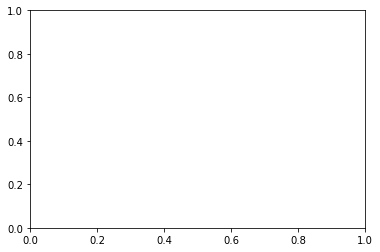

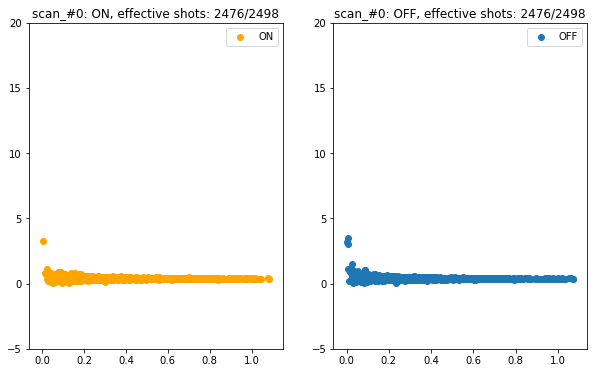

step 2 of 4 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-monoscan/run_002398.BSREAD.h5
Found 9999 shots in the file
Load 9998 shots
Pump/umpump arrays have 2499 shots each


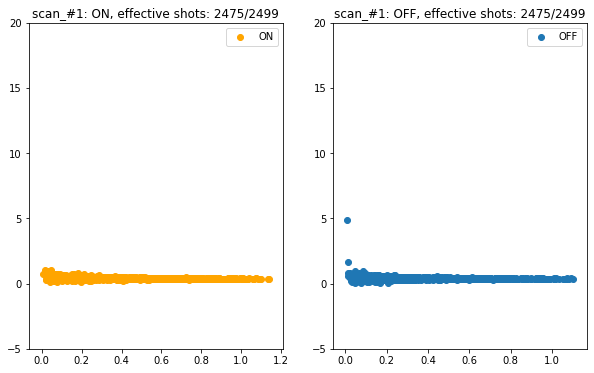

step 3 of 4 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-monoscan/run_002399.BSREAD.h5
Found 9999 shots in the file
Load 9998 shots
Pump/umpump arrays have 2498 shots each


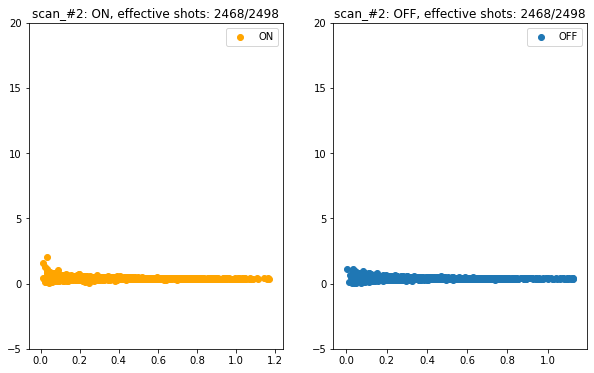

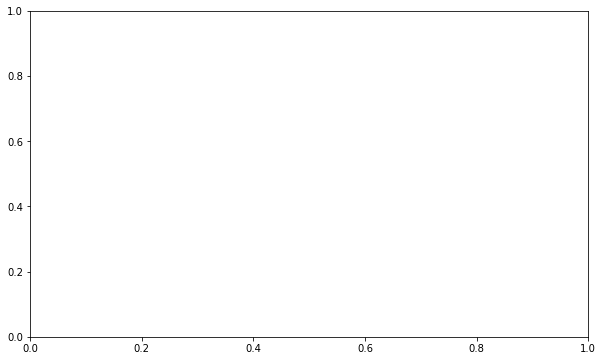

In [14]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML
from numpy.linalg import lstsq


DataFluo_pump = []
DataFluo_unpump = []
err_DataFluo_pump = []
err_DataFluo_unpump = []

DataTrans_pump = []
DataTrans_unpump = []
err_DataTrans_pump = []
err_DataTrans_unpump = []

Pump_probe = []
err_Pump_probe = []

Delay_mm = []

print (scan_range)

json_file = DIR_json + scan_name + scan_range + ".json"
print (json_file)

with open(json_file) as file:
    data = json.load(file)
numFiles = len(data['scan_files'])


# outdir = '/das/work/p18/p18387/alvra_beamline_scripts/pngs_'+scan_name+scan_range.replace('.', '')
# if not os.path.isdir(outdir):
#     os.mkdir(outdir)


plt.cla()
for i in range(0,numFiles):
    plt.figure(figsize = (10,6))
    plt.cla()
    filename = str(data['scan_files'][i][0])    
    exists = os.path.isfile(filename)
    if exists: # and i!=8:
        print("step",i+1,"of",numFiles,": Processing %s" %(str(data['scan_files'][i][0])))
        
        (DataFluo_pump_shot, DataFluo_unpump_shot, IzeroFEL_pump_shot, IzeroFEL_unpump_shot, Delay_shot, \
         DataTrans_pump_shot, DataTrans_unpump_shot) = load_PumpProbe_events(filename, channel_delay)
        
        numShots_o = len(DataFluo_pump_shot)
        
        ###################I0 threshold#########################
        threshold_pump = IzeroFEL_pump_shot > 0.0
        threshold_unpump = IzeroFEL_unpump_shot > 0.0
        threshold_pump_shot = DataFluo_pump_shot > 0
        threshold_unpump_shot = DataFluo_unpump_shot > 0
        ########################################################
        
        #########################################################
        min_pump_shot = min(DataFluo_pump_shot.tolist())
        min_unpump_shot = min(DataFluo_unpump_shot.tolist())
#         DataFluo_pump_shot = DataFluo_pump_shot +((-1)*min_pump_shot)*(min_pump_shot < 0)
#         DataFluo_unpump_shot = DataFluo_unpump_shot +((-1)*min_unpump_shot)*(min_unpump_shot < 0)
        #########################################################
        
#         print (np.median(IzeroFEL_pump_shot)+4*(np.std(IzeroFEL_pump_shot)))
        condition_pump = IzeroFEL_pump_shot < np.median(IzeroFEL_pump_shot)+4*(np.std(IzeroFEL_pump_shot))
        condition_unpump = IzeroFEL_unpump_shot < np.median(IzeroFEL_unpump_shot)+4*(np.std(IzeroFEL_unpump_shot))

        DataFluo_pump_shot = DataFluo_pump_shot[condition_pump & threshold_pump & threshold_pump_shot]
        IzeroFEL_pump_shot = IzeroFEL_pump_shot[condition_pump & threshold_pump & threshold_pump_shot]
        
        DataFluo_unpump_shot = DataFluo_unpump_shot[condition_unpump & threshold_unpump & threshold_unpump_shot]
        IzeroFEL_unpump_shot = IzeroFEL_unpump_shot[condition_unpump & threshold_unpump & threshold_unpump_shot]
              
        DataFluo_pump_shot_norm = DataFluo_pump_shot / IzeroFEL_pump_shot
        DataFluo_unpump_shot_norm = DataFluo_unpump_shot / IzeroFEL_unpump_shot
        
        Delay_shot = [x for x in Delay_shot if (np.abs(x) > 0)]
        Delay_mm.append(np.mean(Delay_shot))
        
        plt.subplot(1,2,1)
        plt.scatter(IzeroFEL_pump_shot,DataFluo_pump_shot/IzeroFEL_pump_shot,label='ON',color='orange')
#         x = IzeroFEL_pump_shot
#         y = DataFluo_pump_shot
#         x = x[:,np.newaxis]
#         a, _, _, _ = np.linalg.lstsq(x, y)
#         plt.plot(x,a*x,label='fit',color='k')
        plt.title('scan_#'+str(i)+': ON, effective shots: '+str(len(DataFluo_pump_shot))+'/'+str(numShots_o))
#         plt.xlim([0.0,0.95])
        plt.ylim([-5,20])
        plt.legend()
        plt.subplot(1,2,2)
        plt.scatter(IzeroFEL_unpump_shot, DataFluo_unpump_shot/IzeroFEL_unpump_shot,label='OFF')
#         x = IzeroFEL_unpump_shot
#         y = DataFluo_unpump_shot
#         x = x[:,np.newaxis]
#         a, _, _, _ = np.linalg.lstsq(x, y)
#         plt.plot(x,a*x,label='fit',color='k')
        plt.title('scan_#'+str(i)+': OFF, effective shots: '+str(len(DataFluo_pump_shot))+'/'+str(numShots_o))
#         plt.xlim([0.0,0.95])
        plt.ylim([-5,20])
        plt.legend()
#         plt.savefig(outdir+'/'+'scan_#'+str(i)+':'+str(np.mean(Delay_shot))+'.png')
        plt.show()

In [6]:
print (np.arange(-1,3,0.05))

[-1.0000000e+00 -9.5000000e-01 -9.0000000e-01 -8.5000000e-01
 -8.0000000e-01 -7.5000000e-01 -7.0000000e-01 -6.5000000e-01
 -6.0000000e-01 -5.5000000e-01 -5.0000000e-01 -4.5000000e-01
 -4.0000000e-01 -3.5000000e-01 -3.0000000e-01 -2.5000000e-01
 -2.0000000e-01 -1.5000000e-01 -1.0000000e-01 -5.0000000e-02
  8.8817842e-16  5.0000000e-02  1.0000000e-01  1.5000000e-01
  2.0000000e-01  2.5000000e-01  3.0000000e-01  3.5000000e-01
  4.0000000e-01  4.5000000e-01  5.0000000e-01  5.5000000e-01
  6.0000000e-01  6.5000000e-01  7.0000000e-01  7.5000000e-01
  8.0000000e-01  8.5000000e-01  9.0000000e-01  9.5000000e-01
  1.0000000e+00  1.0500000e+00  1.1000000e+00  1.1500000e+00
  1.2000000e+00  1.2500000e+00  1.3000000e+00  1.3500000e+00
  1.4000000e+00  1.4500000e+00  1.5000000e+00  1.5500000e+00
  1.6000000e+00  1.6500000e+00  1.7000000e+00  1.7500000e+00
  1.8000000e+00  1.8500000e+00  1.9000000e+00  1.9500000e+00
  2.0000000e+00  2.0500000e+00  2.1000000e+00  2.1500000e+00
  2.2000000e+00  2.25000

## plot hist_I0If

step 1 of 41 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-Timescan/run_001422.BSREAD.h5
Found 3999 shots in the file
Load 3998 shots
Pump/umpump arrays have 998 shots each
step 2 of 41 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-Timescan/run_001423.BSREAD.h5
Found 3999 shots in the file
Load 3998 shots
Pump/umpump arrays have 998 shots each
step 3 of 41 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-Timescan/run_001424.BSREAD.h5
Found 3999 shots in the file
Load 3998 shots
Pump/umpump arrays have 999 shots each
step 4 of 41 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-Timescan/run_001425.BSREAD.h5
Found 3999 shots in the file
Load 3998 shots
Pump/umpump arrays have 998 shots each
step 5 of 41 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-Timescan/run_001426.BSREAD.h5
Found 3999 shots in the file
Load 3998 shots
Pump/umpump arrays have 999 shots each
step 6 of 41 : Processing /sf/alvra/data/p18387/ra

/das/work/p18/p18387/anaconda/alvra-analysis-p18387/lib/python3.6/site-packages/ipykernel/__main__.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Found 3999 shots in the file
Load 3998 shots
Pump/umpump arrays have 999 shots each
step 21 of 41 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-Timescan/run_001442.BSREAD.h5
Found 3999 shots in the file
Load 3998 shots
Pump/umpump arrays have 999 shots each
step 22 of 41 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-Timescan/run_001443.BSREAD.h5
Found 3999 shots in the file
Load 3998 shots
Pump/umpump arrays have 998 shots each
step 23 of 41 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-Timescan/run_001444.BSREAD.h5
Found 3999 shots in the file
Load 3998 shots
Pump/umpump arrays have 998 shots each
step 24 of 41 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-Timescan/run_001445.BSREAD.h5
Found 3999 shots in the file
Load 3998 shots
Pump/umpump arrays have 998 shots each
step 25 of 41 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-Timescan/run_001446.BSREAD.h5
Found 3999 shots in the file
Load 3998 shots


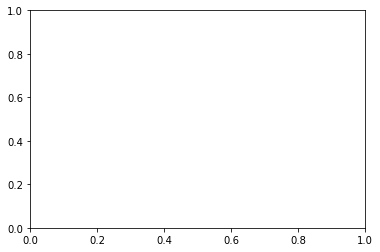

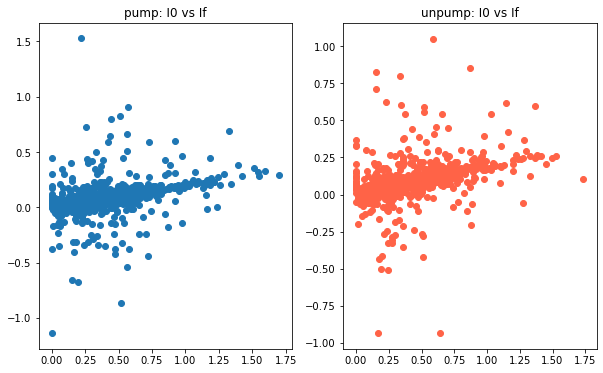

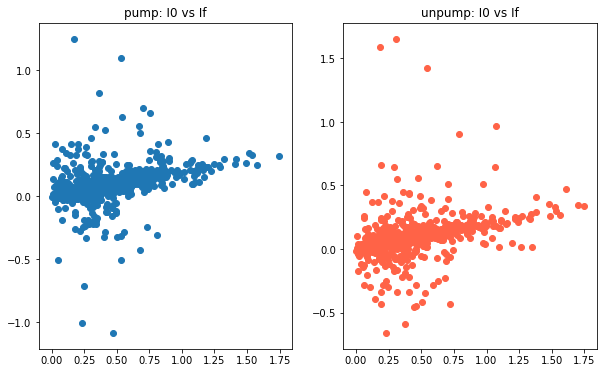

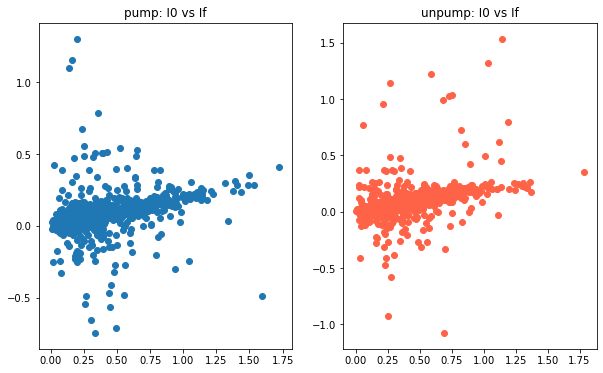

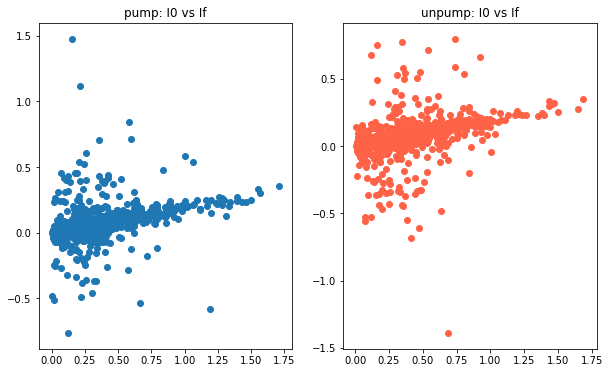

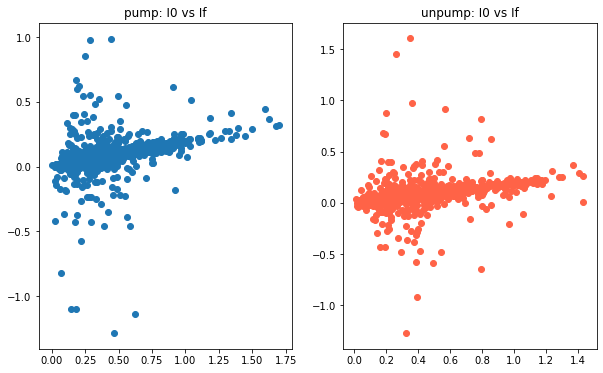

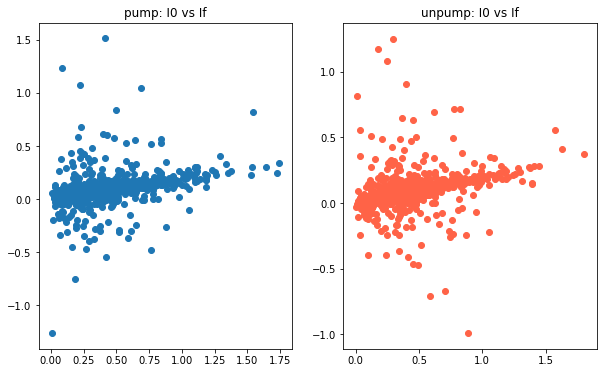

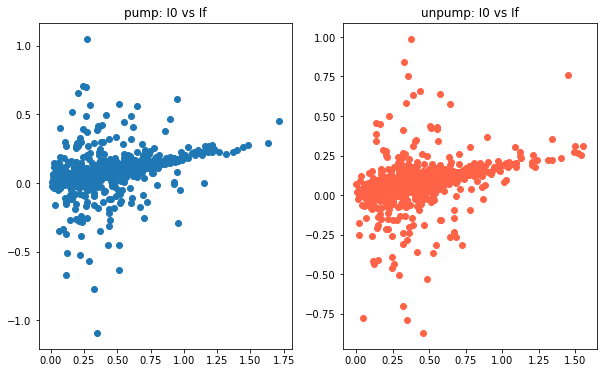

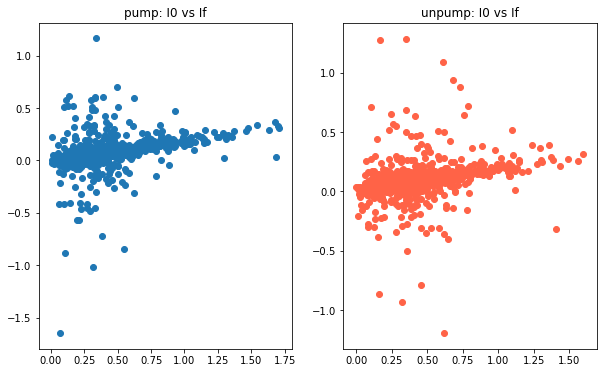

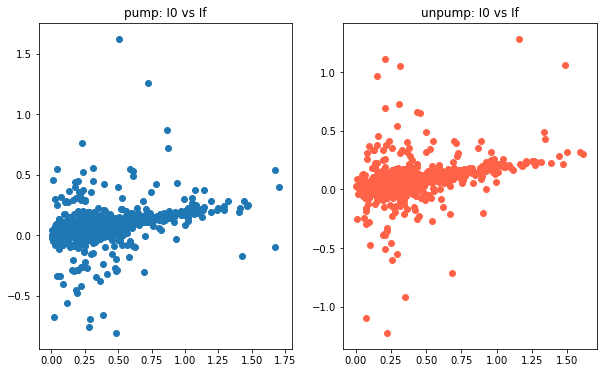

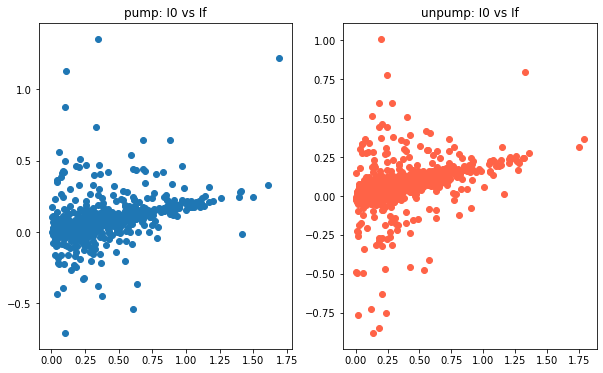

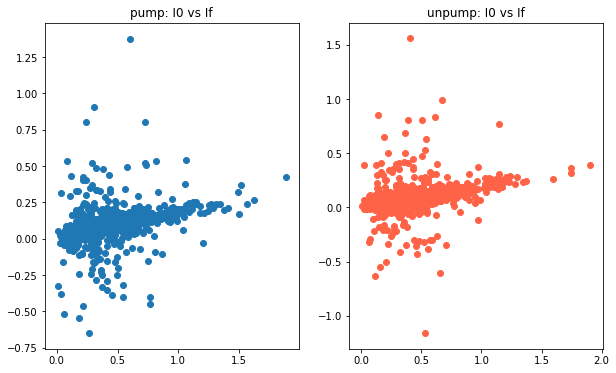

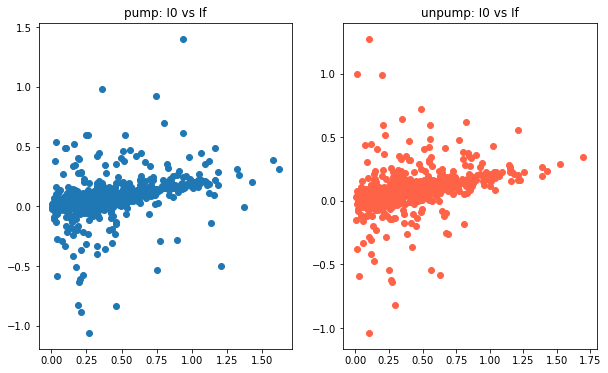

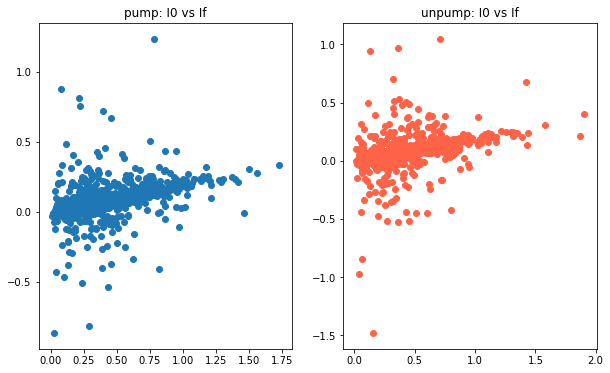

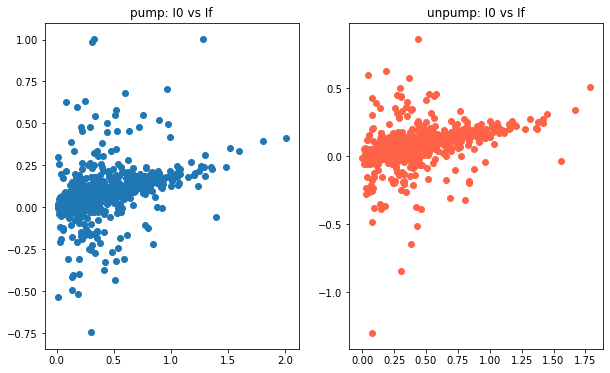

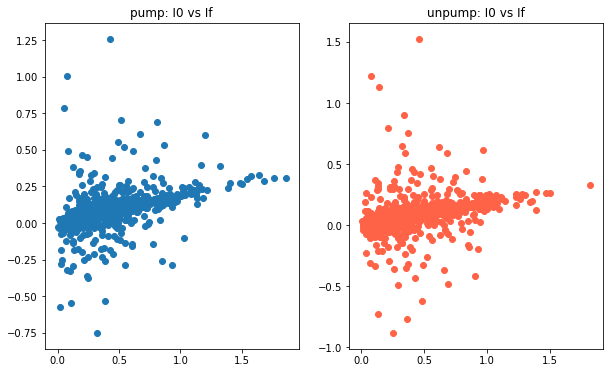

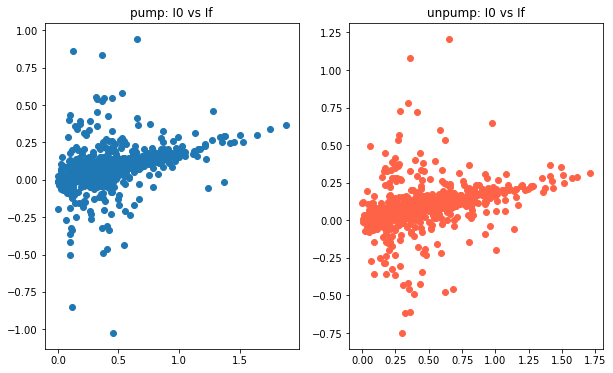

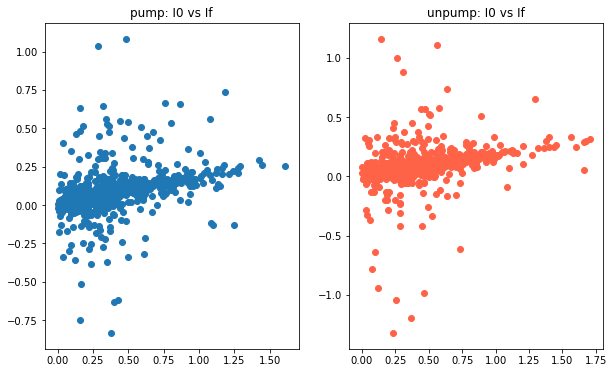

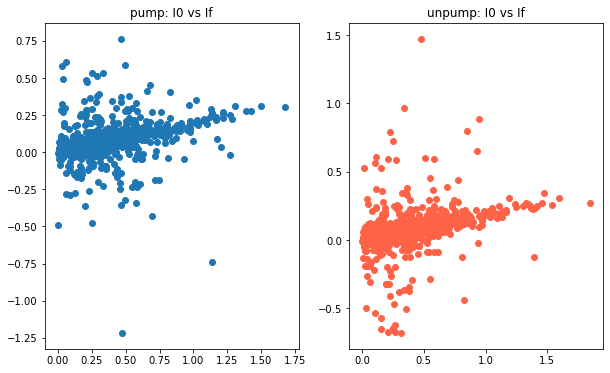

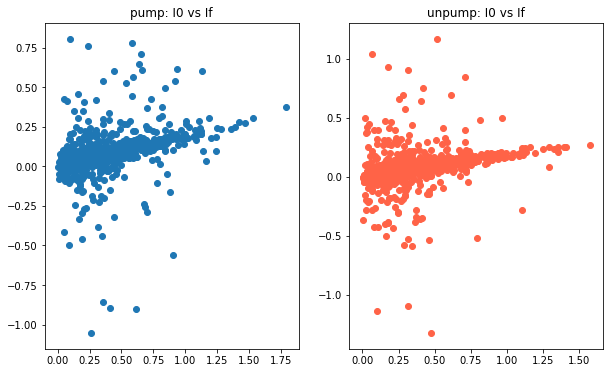

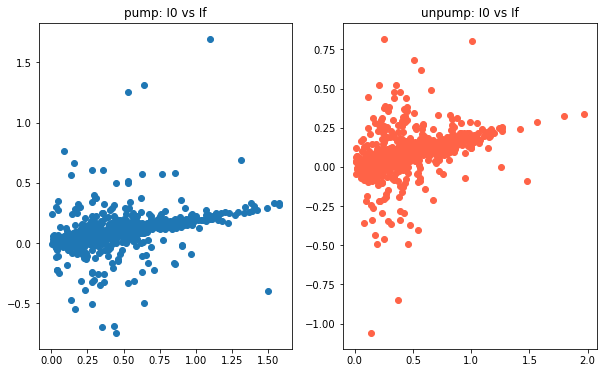

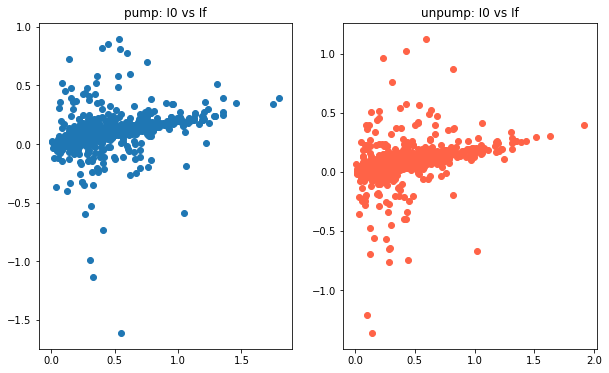

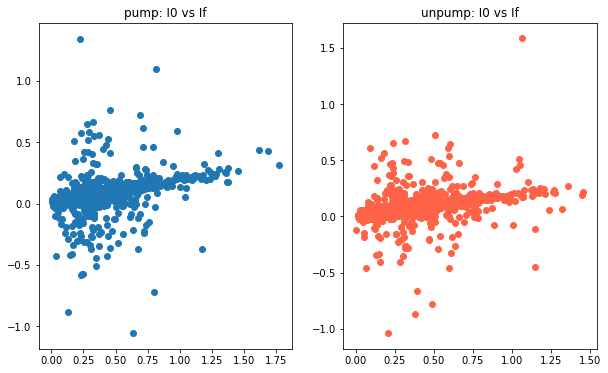

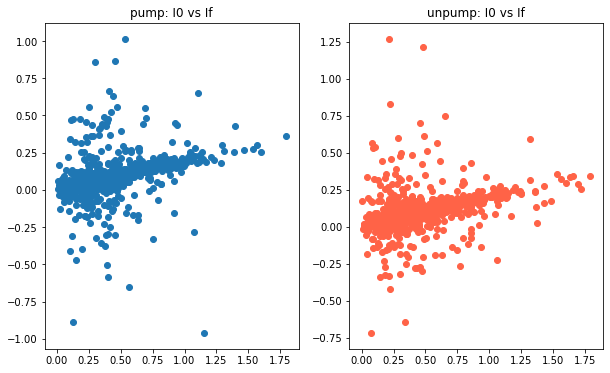

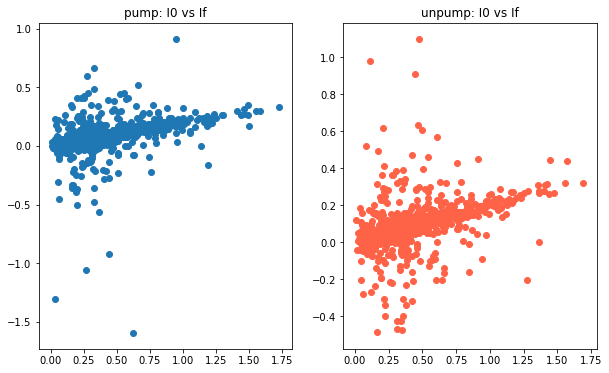

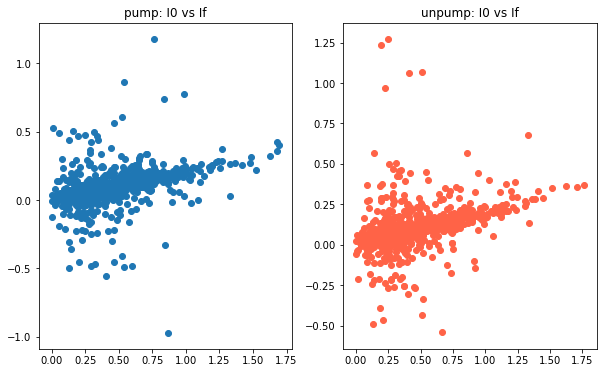

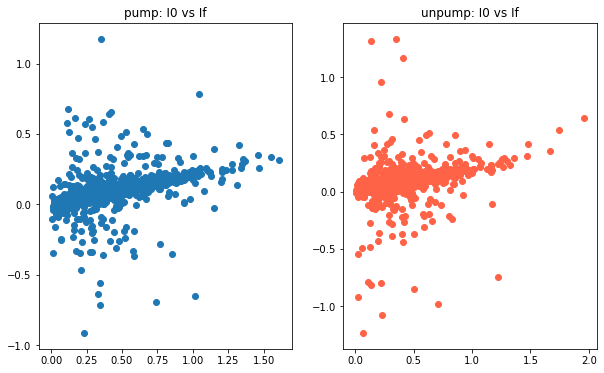

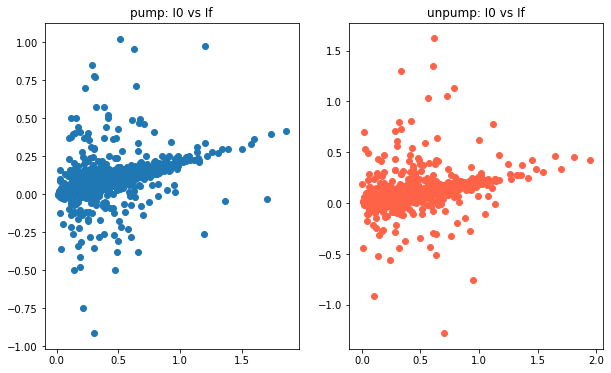

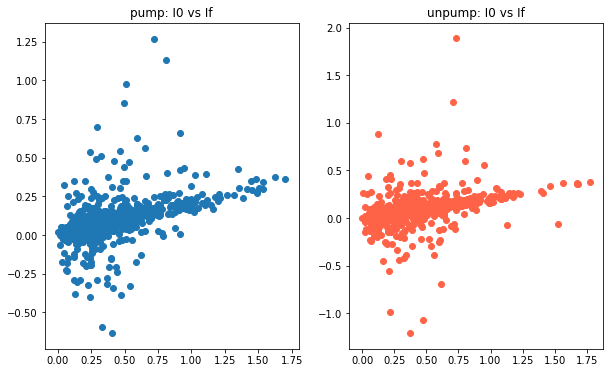

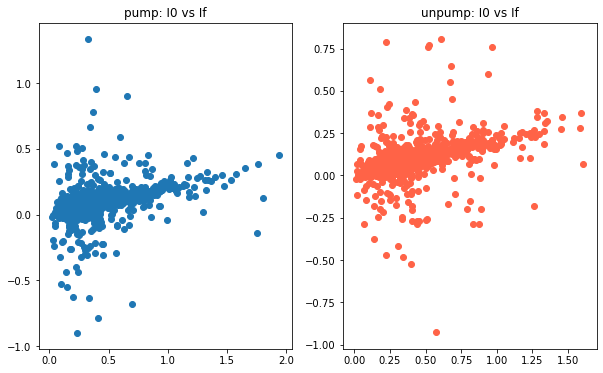

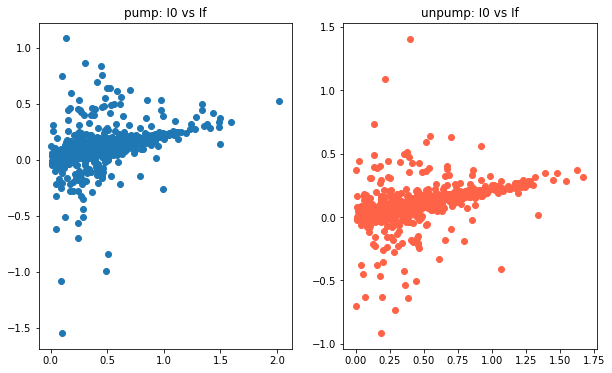

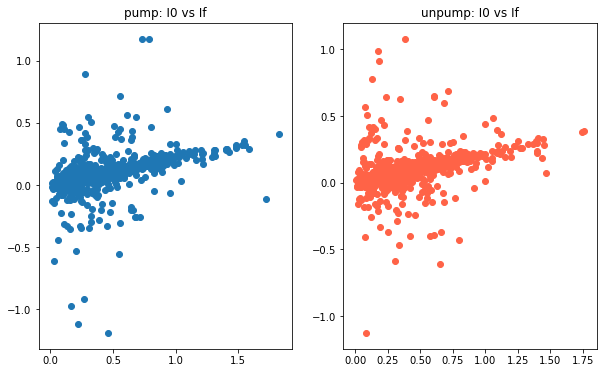

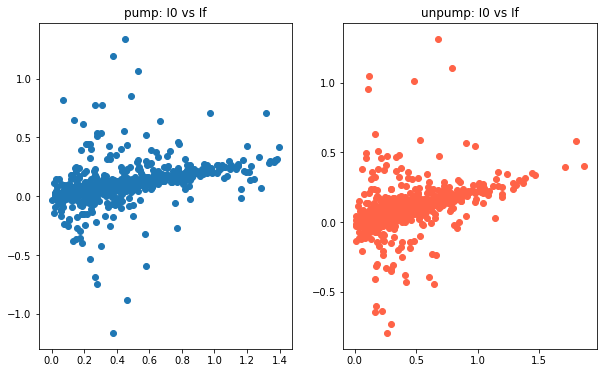

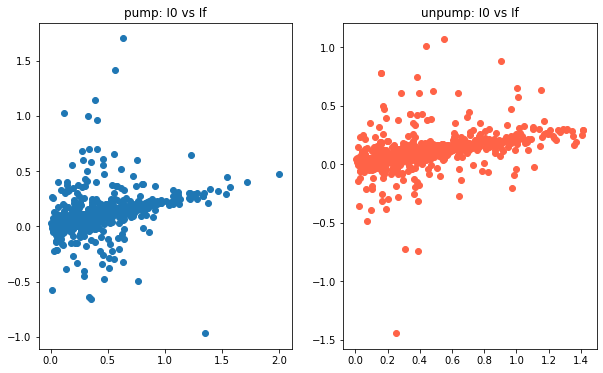

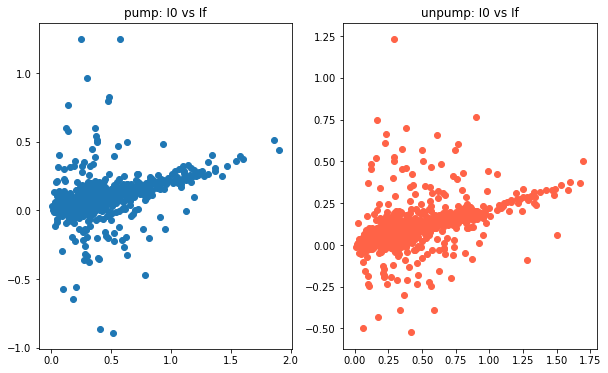

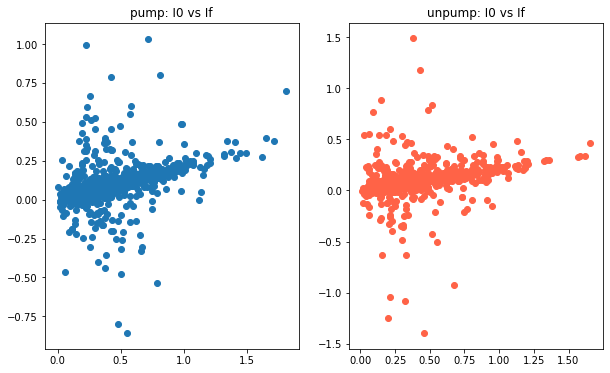

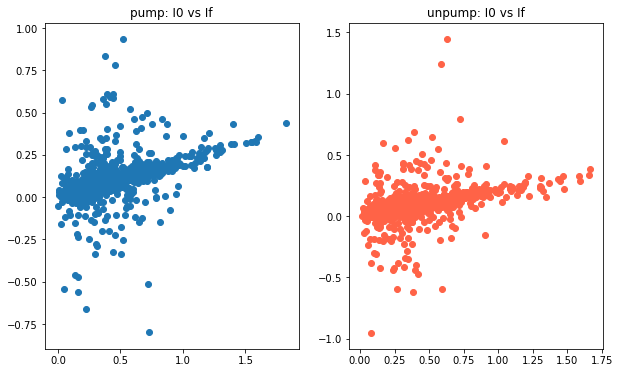

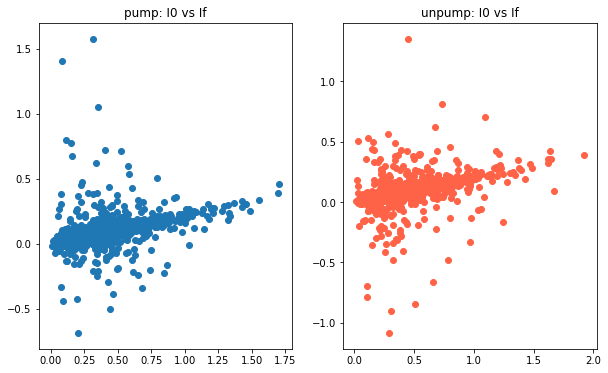

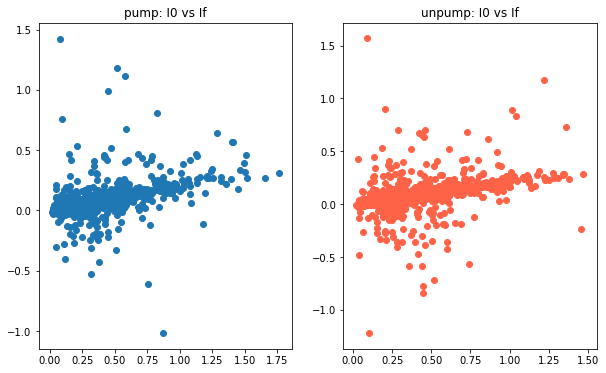

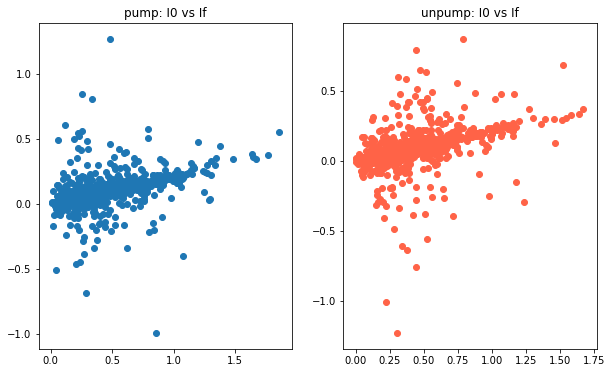

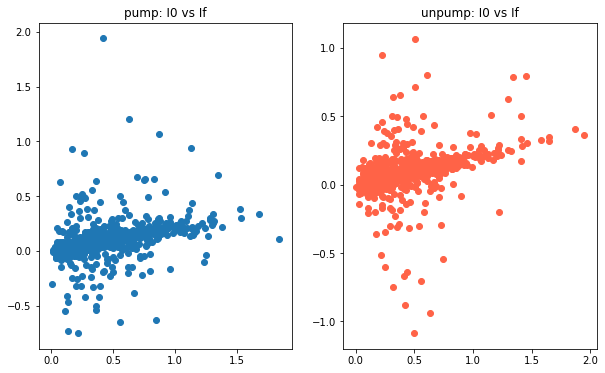

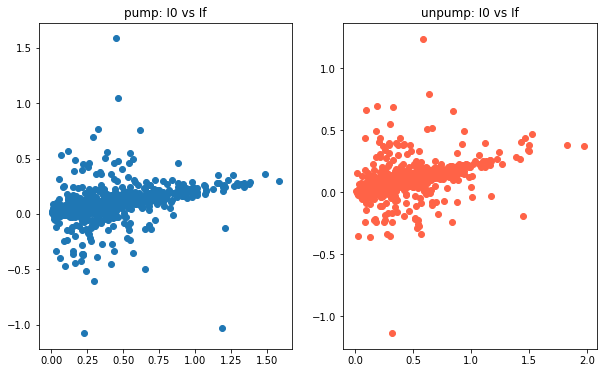

In [8]:
%matplotlib inline

import numpy as np
import json
import os, math
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from alvra_tools.load_data import *
from alvra_tools.channels import *
#from alvra_tools.channels_raw import *
from alvra_tools.utils import errfunc_sigma, errfunc_fwhm

# scan_name ="XAS-L-cystine-monoscan"
# scan_range =".run001491-001530"

scan_name ="XAS-L-cystine-Timescan"
scan_range =".run001422-001462"
    
#DIR = "/sf/alvra/data/p18387/raw
#DIR_json = "/sf/alvra/data/p17983/res/scan_info/"

#DIR = "/sf/alvra/data/p18387/raw/scan_data/" + scan_name + "/"
DIR = "/sf/alvra/data/p18387/raw/scan_data/" + scan_name + "/"

DIR_json = "/sf/alvra/data/p18387/res/scan_info/"
#DIR = "/das/work/p17/p17983/Example_data/raw/scan_data/" + scan_name + "/"
#DIR_json = "/das/work/p17/p17983/Example_data/res/scan_info/"


# !ls -lah -rt $DIR
# !hostname

listfile = os.listdir(DIR)
number_files = len(listfile)


from matplotlib import animation, rc
# from IPython.display import HTML
# from numpy.linalg import lstsq


DataFluo_pump = []
DataFluo_unpump = []
err_DataFluo_pump = []
err_DataFluo_unpump = []

DataTrans_pump = []
DataTrans_unpump = []
err_DataTrans_pump = []
err_DataTrans_unpump = []

Pump_probe = []
err_Pump_probe = []

Delay_mm = []

json_file = DIR_json + scan_name + scan_range + ".json"
# print (json_file)

with open(json_file) as file:
    data = json.load(file)
numFiles = len(data['scan_files'])


outdir = '/das/work/p18/p18387/alvra_beamline_scripts/pngs_'+scan_name+scan_range.replace('.', '')
if not os.path.isdir(outdir):
    os.mkdir(outdir)


plt.cla()
for i in range(0,numFiles):
    plt.figure(figsize = (10,6))
    plt.cla()
    filename = str(data['scan_files'][i][0])    
    exists = os.path.isfile(filename)
    if exists: # and i!=8:
        print("step",i+1,"of",numFiles,": Processing %s" %(str(data['scan_files'][i][0])))
        
        (DataFluo_pump_shot, DataFluo_unpump_shot, IzeroFEL_pump_shot, IzeroFEL_unpump_shot, Delay_shot, \
         DataTrans_pump_shot, DataTrans_unpump_shot) = load_PumpProbe_events(filename, channel_delay)
        
        plt.subplot(1,2,1)
        plt.scatter(IzeroFEL_pump_shot,DataFluo_pump_shot)
        plt.title('pump: I0 vs If')
        plt.subplot(1,2,2)
        plt.scatter(IzeroFEL_unpump_shot,DataFluo_unpump_shot,color='tomato')
        plt.title('unpump: I0 vs If')
        
#         numShots_o = len(DataFluo_pump_shot)
#         print (len(DataFluo_pump_shot))
#         plt.subplot(1,2,1)
#         plt.hist(IzeroFEL_pump_shot,bins=np.arange(-1,2,0.01))
#         plt.subplot(1,2,2)
#         plt.hist(DataFluo_pump_shot,bins=np.arange(-1,2,0.01))
#         print (len(IzeroFEL_pump_shot), len(DataFluo_pump_shot))

In [149]:
#json_file = DIR_json + scan_name + "_scan_info.json"
json_file = DIR_json + scan_name + scan_range + ".json"
print (json_file)

with open(json_file) as file:
    data = json.load(file)
numFiles = len(data['scan_files'])
print ()
#numFiles = 35

print ("Processing",numFiles,"files")

DataFluo_pump = []
DataFluo_unpump = []
err_DataFluo_pump = []
err_DataFluo_unpump = []

DataTrans_pump = []
DataTrans_unpump = []
err_DataTrans_pump = []
err_DataTrans_unpump = []

Pump_probe = []
err_Pump_probe = []

Energy_eV = []


# from itertools import chain
# concatenated = chain(range(0,37), range(43, 50))
# for i in concatenated:
for i in range(0,numFiles):             
    filename = str(data['scan_files'][i][0])    
    exists = os.path.isfile(filename)
    if exists: #and i!=0:
        print("step",i+1,"of",numFiles,": Processing %s" %(str(data['scan_files'][i][0])))
        
        (DataFluo_pump_shot, DataFluo_unpump_shot, IzeroFEL_pump_shot, IzeroFEL_unpump_shot, Energy_shot, \
         DataTrans_pump_shot, DataTrans_unpump_shot) = load_PumpProbe_events(filename, channel_energy)
        
        ###################I0 threshold#########################
        threshold_pump = IzeroFEL_pump_shot > 0.1
        threshold_unpump = IzeroFEL_unpump_shot > 0.1
        threshold_pump_shot = DataFluo_pump_shot > 0.0001
        threshold_unpump_shot = DataFluo_unpump_shot > 0.0001
        ########################################################
        
        scale_I0 = 2.5
        ############################I0 maximum#####################
        condition_pump = IzeroFEL_pump_shot < np.median(IzeroFEL_pump_shot)+scale_I0*(np.std(IzeroFEL_pump_shot))
        print (np.median(IzeroFEL_pump_shot)+scale_I0*(np.std(IzeroFEL_pump_shot)))
        condition_unpump = IzeroFEL_unpump_shot < np.median(IzeroFEL_unpump_shot)+scale_I0*(np.std(IzeroFEL_unpump_shot))

        DataFluo_pump_shot = DataFluo_pump_shot[condition_pump & threshold_pump & threshold_pump_shot]
        IzeroFEL_pump_shot = IzeroFEL_pump_shot[condition_pump & threshold_pump & threshold_pump_shot]
#         DataFluo_pump_shot = DataFluo_pump_shot[condition_pump & condition_unpump & threshold_pump & threshold_unpump]
#         IzeroFEL_pump_shot = IzeroFEL_pump_shot[condition_pump & condition_unpump & threshold_pump & threshold_unpump]
#       DataTrans_pump_shot = DataTrans_pump_shot[condition_pump & condition_unpump & threshold_pump & threshold_unpump]
        
        DataFluo_unpump_shot = DataFluo_unpump_shot[condition_unpump & threshold_unpump & threshold_unpump_shot]
        IzeroFEL_unpump_shot = IzeroFEL_unpump_shot[condition_unpump & threshold_unpump & threshold_unpump_shot]
#         DataFluo_unpump_shot = DataFluo_unpump_shot[condition_pump & condition_unpump & threshold_pump & threshold_unpump]
#         IzeroFEL_unpump_shot = IzeroFEL_unpump_shot[condition_pump & condition_unpump & threshold_pump & threshold_unpump]
#       DataTrans_unpump_shot = DataTrans_unpump_shot[condition_pump & condition_unpump & threshold_pump & threshold_unpump]
        
              
        DataFluo_pump_shot_norm = DataFluo_pump_shot / IzeroFEL_pump_shot
        DataFluo_unpump_shot_norm = DataFluo_unpump_shot / IzeroFEL_unpump_shot
        
        scale_std = 1
        ###########Data Selection for pump####################
        avg = np.average(DataFluo_pump_shot_norm)
        std = np.std(DataFluo_pump_shot_norm)
        tData_pump = np.array([x for x in  DataFluo_pump_shot_norm if abs(x-avg) <= scale_std*std ])
        x = IzeroFEL_pump_shot
        y = DataFluo_pump_shot
        x = x[:,np.newaxis]
        a, rsd, _, _ = np.linalg.lstsq(x, y)
        print (rsd)
        #DataFluo_pump.append(np.average(tData_pump))
        DataFluo_pump.append(a[0])
        err_DataFluo_pump.append(np.std(tData_pump)/math.sqrt(len(tData_pump)))
        
        
        ###########Data Selection for unpump####################
        avg = np.average(DataFluo_unpump_shot_norm)
        std = np.std(DataFluo_unpump_shot_norm)
        tData_unpump = np.array([x for x in  DataFluo_unpump_shot_norm if abs(x-avg) <= scale_std*std ])
        
        x = IzeroFEL_unpump_shot
        y = DataFluo_unpump_shot
        x = x[:,np.newaxis]
        a, rsd, _, _ = np.linalg.lstsq(x, y)
        #DataFluo_pump.append(np.average(tData_pump))
#         print (a)
        DataFluo_unpump.append(a[0])
        
#         DataFluo_unpump.append(np.average(tData_unpump))
        err_DataFluo_unpump.append(np.std(tData_unpump)/math.sqrt(len(tData_unpump)))
        
        
        Energy_shot = [x for x in Energy_shot if (np.abs(x) > 0)]
        Energy_eV.append(np.mean(Energy_shot))
    
DataFluo_pump = np.asarray(DataFluo_pump)
DataFluo_unpump = np.asarray(DataFluo_unpump)
DataTrans_pump = np.asarray(DataTrans_pump)
DataTrans_unpump = np.asarray(DataTrans_unpump)
              
# Pump_probe = np.asarray(Pump_probe)
# err_Pump_probe = np.asarray(err_Pump_probe)
              
err_DataFluo_pump = np.asarray(err_DataFluo_pump)
err_DataFluo_unpump = np.asarray(err_DataFluo_unpump)
err_DataTrans_pump = np.asarray(err_DataTrans_pump)
err_DataTrans_unpump = np.asarray(err_DataTrans_unpump)

# print (err_DataFluo_pump)

Energy_eV = np.asarray(Energy_eV)

print ("Job done!")

/sf/alvra/data/p18387/res/scan_info/XAS-L-cystine-monoscan.run001491-001530.json

Processing 40 files
step 1 of 40 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-monoscan/run_001491.BSREAD.h5
Found 7999 shots in the file
Load 7998 shots
Pump/umpump arrays have 1999 shots each
0.866246767980943
[15.28738128]
step 2 of 40 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-monoscan/run_001492.BSREAD.h5
Found 7999 shots in the file
Load 7998 shots
Pump/umpump arrays have 1998 shots each
0.8353603806175129
[17.15231523]
step 3 of 40 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-monoscan/run_001493.BSREAD.h5
Found 7999 shots in the file
Load 7998 shots
Pump/umpump arrays have 1999 shots each
0.8191601623866673
[13.95560857]
step 4 of 40 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-monoscan/run_001494.BSREAD.h5
Found 7999 shots in the file
Load 7998 shots
Pump/umpump arrays have 1999 shots each
0.8115635658646105
[17.90171108]
ste

/das/work/p18/p18387/anaconda/alvra-analysis-p18387/lib/python3.6/site-packages/ipykernel/__main__.py:78: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/das/work/p18/p18387/anaconda/alvra-analysis-p18387/lib/python3.6/site-packages/ipykernel/__main__.py:93: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Pump/umpump arrays have 1999 shots each
0.8394754563219936
[17.55456414]
step 6 of 40 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-monoscan/run_001496.BSREAD.h5
Found 7999 shots in the file
Load 7998 shots
Pump/umpump arrays have 1998 shots each
0.8015832419600271
[19.97075983]
step 7 of 40 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-monoscan/run_001497.BSREAD.h5
Found 7999 shots in the file
Load 7998 shots
Pump/umpump arrays have 1998 shots each
0.8114867277116077
[19.56701578]
step 8 of 40 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-monoscan/run_001498.BSREAD.h5
Found 7999 shots in the file
Load 7998 shots
Pump/umpump arrays have 1999 shots each
0.8409110523513839
[20.5088276]
step 9 of 40 : Processing /sf/alvra/data/p18387/raw/scan_data/XAS-L-cystine-monoscan/run_001499.BSREAD.h5
Found 7999 shots in the file
Load 7998 shots
Pump/umpump arrays have 1999 shots each
0.853074283493083
[20.39081814]
step 10 of 40 : Processing /sf/al

## Plot XAS from linfit

/das/work/p18/p18387/anaconda/alvra-analysis-p18387/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


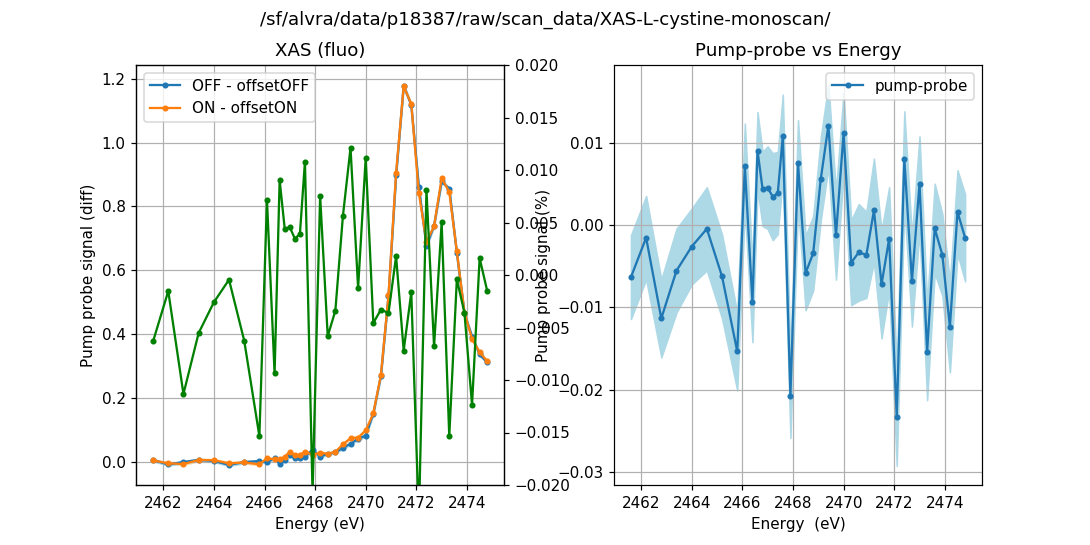

0.008309110308072876


In [148]:
plt.figure(figsize = (10,5))
plt.suptitle(DIR, fontsize=12)
scale=1
#plt.title(DIR,horizontalalignment='right')

Pump_probe = DataFluo_pump - DataFluo_unpump

offset_corr_DataFluo_pump = scale*DataFluo_pump - np.mean(scale*DataFluo_pump[-10:])
offset_corr_DataFluo_unpump = scale*DataFluo_unpump - np.mean(scale*DataFluo_unpump[-10:])
offset_corr_pump_probe = offset_corr_DataFluo_pump - offset_corr_DataFluo_unpump


#print (DataFluo_pump)

low_err_pump_offset       = offset_corr_DataFluo_pump - err_DataFluo_pump
high_err_pump_offset      = offset_corr_DataFluo_pump + err_DataFluo_pump
low_err_unpump_offset     = offset_corr_DataFluo_unpump - err_DataFluo_unpump
high_err_unpump_offset    = offset_corr_DataFluo_unpump + err_DataFluo_unpump
low_err_pumpprobe_offset  = (Pump_probe) - np.sqrt(err_DataFluo_pump**2+err_DataFluo_unpump**2)
high_err_pumpprobe_offset = (Pump_probe) + np.sqrt(err_DataFluo_pump**2+err_DataFluo_unpump**2)


low_err_pump = DataFluo_pump - err_DataFluo_pump
high_err_pump = DataFluo_pump + err_DataFluo_pump
low_err_unpump = DataFluo_unpump - err_DataFluo_unpump
high_err_unpump = DataFluo_unpump + err_DataFluo_unpump
low_err_pumpprobe = (Pump_probe) - np.sqrt(err_DataFluo_pump**2+err_DataFluo_unpump**2)
high_err_pumpprobe = (Pump_probe) + np.sqrt(err_DataFluo_pump**2+err_DataFluo_unpump**2)

ax1 = plt.subplot(1,2,1)
ax1.plot(Energy_eV, offset_corr_DataFluo_unpump, label="OFF - offsetOFF",marker='.')
ax1.plot(Energy_eV, offset_corr_DataFluo_pump, label="ON - offsetON",marker='.')
# plt.plot(Energy_eV, offset_corr_pump_probe, label='pump-probe', marker='.')

ax1.fill_between(Energy_eV, scale*low_err_pump_offset, scale*high_err_pump_offset, color='navajowhite')
ax1.fill_between(Energy_eV, scale*low_err_unpump_offset, scale*high_err_unpump_offset, color='lightblue')
#plt.fill_between(Energy_eV, scale*low_err_pumpprobe_offset, scale*high_err_pumpprobe_offset, color='lightblue')
ax2 = ax1.twinx()
ax2.plot(Energy_eV, Pump_probe, label='pump-probe', marker='.',color='green')
ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel ("Pump probe signal (diff)")
ax1.legend()
ax1.grid()
ax2.set_ylim([-0.02,0.02])
plt.gca().set_title('XAS (fluo)')
#plt.legend(loc="best")
# plt.grid()
plt.subplots_adjust(wspace = 0.3,hspace = 1.) 

# plt.subplot(1,2,1)
# plt.plot(Energy_eV, scale*DataFluo_pump, label="ON",marker='.')
# plt.plot(Energy_eV, scale*DataFluo_unpump, label="OFF",marker='.')
# plt.fill_between(Energy_eV, scale*low_err_pump, scale*high_err_pump, color='lightblue')
# plt.fill_between(Energy_eV, scale*low_err_unpump, scale*high_err_unpump, color='navajowhite')
# plt.xlabel("Energy (eV)")
# plt.gca().set_title('XAS (fluo)')
# plt.legend(loc="best")

plt.subplot(1,2,2)
plt.plot(Energy_eV, scale*(Pump_probe), label="pump-probe",marker='.')
plt.fill_between(Energy_eV, scale*low_err_pumpprobe, scale*high_err_pumpprobe, color='lightblue')
plt.grid()
plt.ylabel ("Pump probe signal (%)")
plt.xlabel("Energy  (eV)")
plt.gca().set_title('Pump-probe vs Energy')
plt.legend(loc="best")
plt.legend(loc="best")
plt.subplots_adjust(wspace = 0.3,hspace = 0.5) 

print (np.std(Pump_probe))

plt.show()